In [2]:
pip install --upgrade numpy


     ---------------------------------------- 15.8/15.8 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\khotv\\anaconda3\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [3]:
pip install --upgrade pandas


  Using cached pandas-2.1.4-cp39-cp39-win_amd64.whl (10.8 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.1
    Uninstalling pandas-2.1.1:
      Successfully uninstalled pandas-2.1.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\khotv\\anaconda3\\Lib\\site-packages\\~andas.libs\\msvcp140-59fdf63e48138046aebeb6ddb5b4e960.dll'
Consider using the `--user` option or check the permissions.



In [6]:
!python -m pip install --upgrade --no-binary :all: pandas



In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

C:\Users\khotv\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import pathlib
data_dir_train=pathlib.Path("C:\\Users\\khotv\\archive (28)\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train")
data_dir_test=pathlib.Path("C:\\Users\\khotv\\archive (28)\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test")


In [5]:
from glob import glob

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [6]:
import random
batch_size = 32
img_height = 180
img_width = 180
rnd_seed = 123
random.seed(rnd_seed)

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 106 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [11]:
class_names_test = test_ds.class_names
print(class_names_test)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


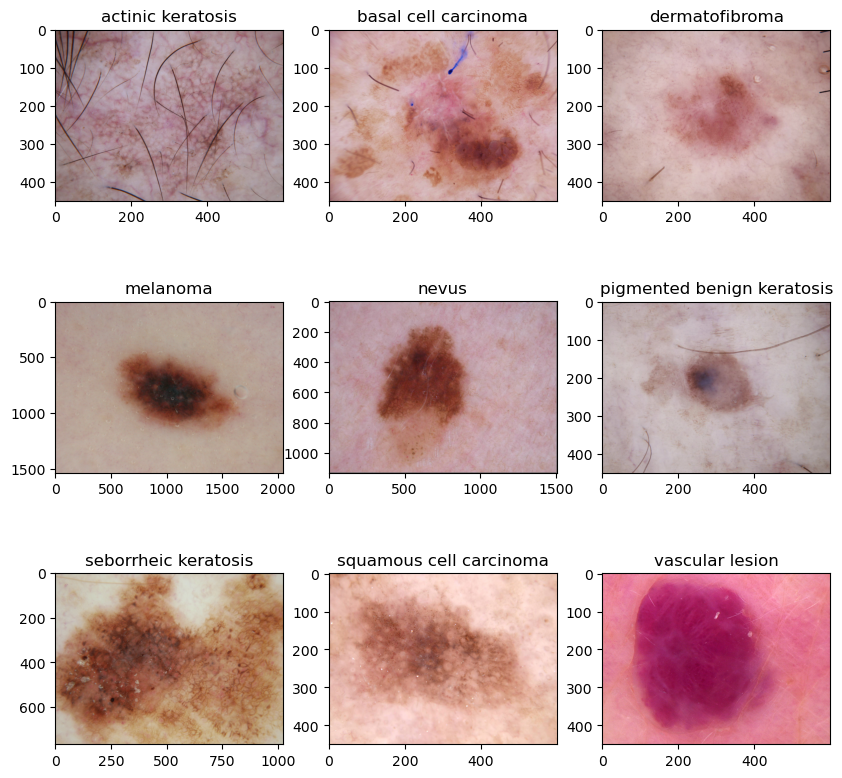

In [12]:
import matplotlib.image as img
num_classes = len(class_names)
plt.figure(figsize=(10,10))
for i in range(num_classes):
  plt.subplot(3,3,i+1)
  image = img.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

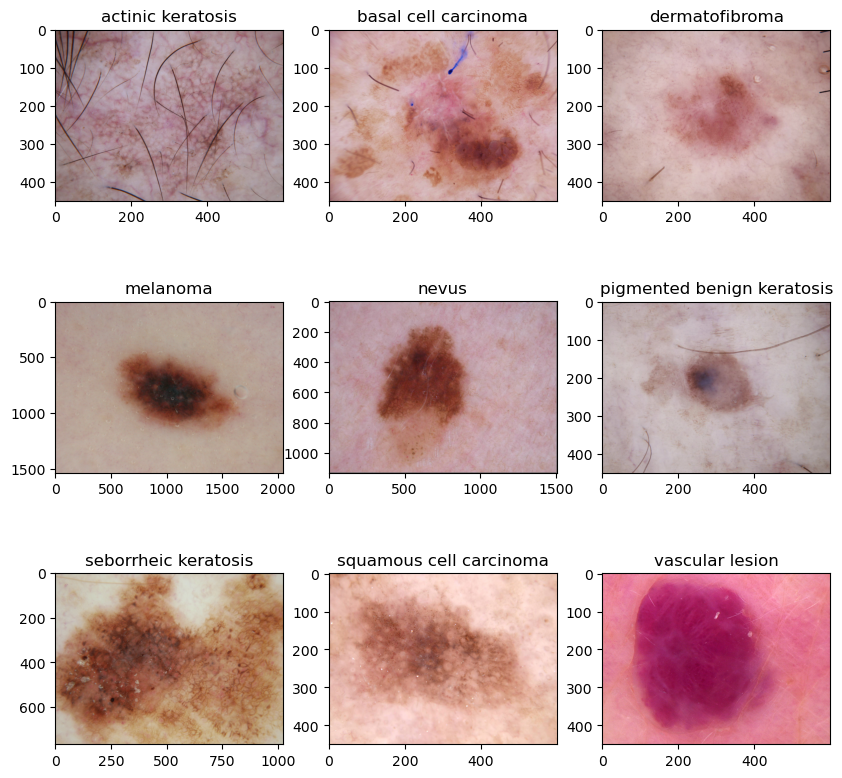

In [13]:
num_classes = len(class_names_test)
plt.figure(figsize=(10,10))
for i in range(num_classes):
  plt.subplot(3,3,i+1)
  image = img.imread(str(list(data_dir_train.glob(class_names_test[i]+'/*.jpg'))[1]))
  plt.title(class_names_test[i])
  plt.imshow(image)

In [14]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 180, 180, 3)
(32,)


In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model Training

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [17]:
#Make convolution
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling \
                    (1.0/255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())


In [18]:
##add dense layer on top
model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

In [20]:
##compile and train model
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [21]:
##Early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [22]:
epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=early_stopping
)

Epoch 1/25


C:\Users\khotv\anaconda3\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 72s 1s/step - loss: 2.0318 - accuracy: 0.2182 - val_loss: 1.8829 - val_accuracy: 0.3289
Epoch 2/25
56/56 [==============================] - 70s 1s/step - loss: 1.8729 - accuracy: 0.3036 - val_loss: 1.7557 - val_accuracy: 0.3400
Epoch 3/25
56/56 [==============================] - 77s 1s/step - loss: 1.6886 - accuracy: 0.3689 - val_loss: 1.7265 - val_accuracy: 0.3468
Epoch 4/25
56/56 [==============================] - 83s 1s/step - loss: 1.6100 - accuracy: 0.4152 - val_loss: 1.5898 - val_accuracy: 0.4273
Epoch 5/25
56/56 [==============================] - 81s 1s/step - loss: 1.5430 - accuracy: 0.4453 - val_loss: 1.5345 - val_accuracy: 0.4765
Epoch 6/25
56/56 [==============================] - 84s 1s/step - loss: 1.4844 - accuracy: 0.4721 - val_loss: 1.5932 - val_accuracy: 0.4899
Epoch 7/25
56/56 [==============================] - 83s 1s/step - loss: 1.4181 - accuracy: 0.5112 - val_loss: 1.4461 - val_accuracy: 0.5078
Epoch 8/25
56/56 [=============

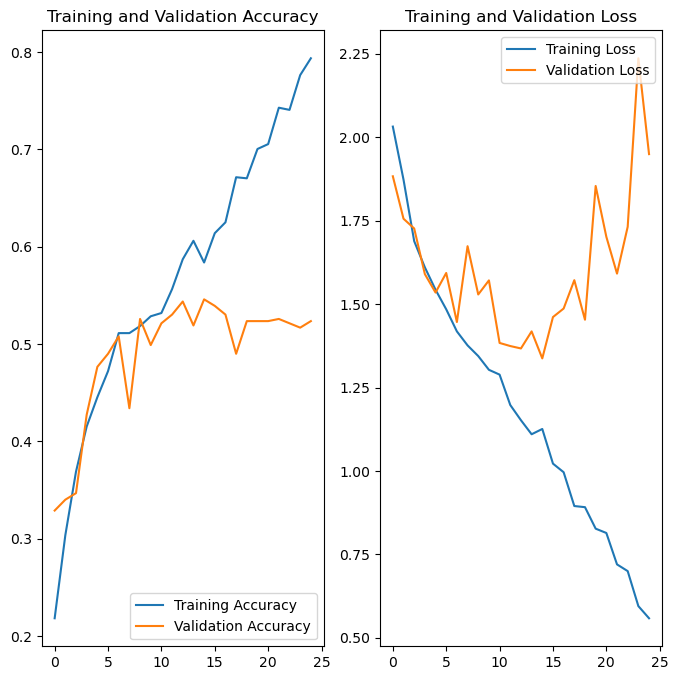

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
#Create a file to save models
model_path = 'C:/Users/khotv/archive (28)/Skin cancer ISIC The International Skin Imaging Collaboration/cnn_fc_model.h5'
model.save(model_path)

C:\Users\khotv\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
# Save the model in the native Keras format
model_path_keras = 'C:/Users/khotv/archive (28)/Skin cancer ISIC The International Skin Imaging Collaboration/cnn_fc_model'
model.save(model_path_keras)


INFO:tensorflow:Assets written to: C:/Users/khotv/archive (28)/Skin cancer ISIC The International Skin Imaging Collaboration/cnn_fc_model\assets


INFO:tensorflow:Assets written to: C:/Users/khotv/archive (28)/Skin cancer ISIC The International Skin Imaging Collaboration/cnn_fc_model\assets


In [26]:
pip install shap


  Using cached shap-0.44.0-cp39-cp39-win_amd64.whl (447 kB)
  Using cached numpy-1.21.6-cp39-cp39-win_amd64.whl (14.0 MB)
  Using cached pandas-2.1.3-cp39-cp39-win_amd64.whl (10.8 MB)
  Using cached pandas-2.1.2-cp39-cp39-win_amd64.whl (10.8 MB)
  Using cached pandas-2.1.1-cp39-cp39-win_amd64.whl (10.8 MB)
  Using cached pandas-2.1.0-cp39-cp39-win_amd64.whl (11.2 MB)
  Using cached pandas-2.0.3-cp39-cp39-win_amd64.whl (10.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\khotv\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [32]:
!pip install shap



  Using cached shap-0.44.0-cp39-cp39-win_amd64.whl (447 kB)
  Using cached pandas-2.1.3-cp39-cp39-win_amd64.whl (10.8 MB)
  Using cached pandas-2.1.2-cp39-cp39-win_amd64.whl (10.8 MB)
  Using cached pandas-2.1.1-cp39-cp39-win_amd64.whl (10.8 MB)
  Using cached pandas-2.1.0-cp39-cp39-win_amd64.whl (11.2 MB)
  Using cached pandas-2.0.3-cp39-cp39-win_amd64.whl (10.8 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\khotv\\anaconda3\\Lib\\site-packages\\~-ndas.libs\\msvcp140-fa0758dedafbbe194d3ee96e3dc2b9a3.dll'
Consider using the `--user` option or check the permissions.



In [35]:
import sys
sys.executable


'C:\\Users\\khotv\\anaconda3\\python.exe'

In [40]:
!pip list


Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.12
altair                        5.0.0
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
asttokens                     2.2.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backp

In [3]:
!pip install lime


     -------------------------------------- 275.7/275.7 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=4e6f5c98db6ee63acbced10489fd91da3516eae97ca1a00099c9685886da0c2a
  Stored in directory: c:\users\khotv\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [4]:
import lime

In [6]:
pip install --upgrade numpy


  Using cached numpy-1.26.2-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\khotv\\anaconda3\\Lib\\site-packages\\~0mpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [8]:
pip install --upgrade tensorflow


     -------------------------------------- 300.8/300.8 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 442.0/442.0 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 6.2 MB/s eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.24.3
    Uninstalling protobuf-4.24.3:
      Successfully uninstalled protobuf-4.24.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\khotv\\anaconda3\\Lib\\site-packages\\google\\~-pb\\_message.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



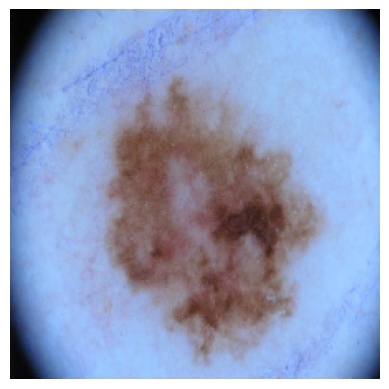

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 60ms/step


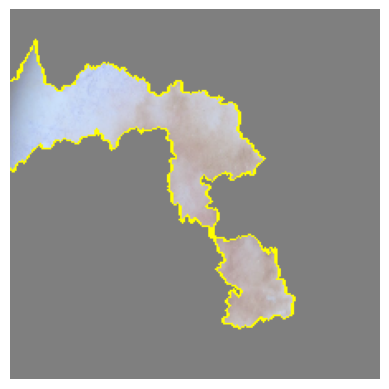

In [9]:
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Load your pre-trained deep neural network model
model_path = 'C:/Users/khotv/archive (28)/Skin cancer ISIC The International Skin Imaging Collaboration/cnn_fc_model'
model = load_model(model_path)

# Load your image for explaining predictions
# Replace 'your_image_path' with the path to your image file
img_path = 'C:/Users/khotv/archive (28)/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma/ISIC_0000002.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Preprocess the image for the model's input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values to between 0 and 1

# Display the original image
plt.imshow(img)
plt.axis('off')
plt.show()

# Resize the LIME images to match the expected input shape of your model
def resize_image(image, target_shape):
    return tf.image.resize(image, target_shape)

# Define a function to predict using the model
def predict_fn(images):
    resized_images = tf.image.resize(images, (180, 180))  # Resize to match the model's expected input shape
    return model.predict(resized_images)

# Create a LimeImageExplainer
explainer = lime_image.LimeImageExplainer()

# Explain the model's predictions on the image
explanation = explainer.explain_instance(img_array[0], predict_fn, top_labels=3, hide_color=0, num_samples=1000)

# Display the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.axis('off')
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 62ms/step


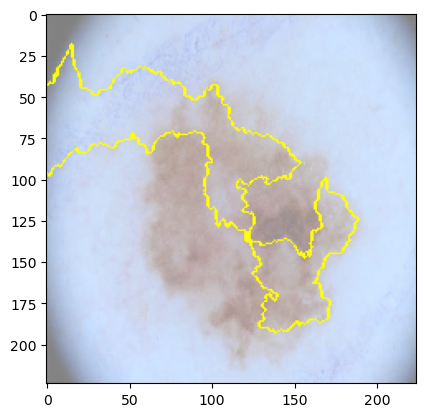

In [12]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Continue from where you left off

# 1. Interpret the Explanation
explanation = explainer.explain_instance(
    img_array[0],
    predict_fn,
    top_labels=3,
    hide_color=0,
    num_samples=1000,
    num_features=100  # Adjust this parameter to control the number of superpixels
)

# 2. Visualize the Explanation
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    hide_rest=False
)

# 3. Display the Image with Explanation
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

